Partea 1)

In [8]:
import numpy as np
import seaborn as sns

np.random.seed(42)

n_samples = 1000
fixed_lambdas = [1, 2, 5, 10]

fixed_poissons = {}
for lam in fixed_lambdas:
    fixed_poissons[f'Poisson(λ={lam})'] = np.random.poisson(lam, n_samples)
    print(f"Poisson(λ={lam}):")
    print(f"  Mean: {fixed_poissons[f'Poisson(λ={lam})'].mean():.2f}")
    print(f"  Variance: {fixed_poissons[f'Poisson(λ={lam})'].var():.2f}")
    print(f"  Min: {fixed_poissons[f'Poisson(λ={lam})'].min()}, Max: {fixed_poissons[f'Poisson(λ={lam})'].max()}")

Poisson(λ=1):
  Mean: 0.97
  Variance: 1.02
  Min: 0, Max: 5
Poisson(λ=2):
  Mean: 2.01
  Variance: 1.90
  Min: 0, Max: 7
Poisson(λ=5):
  Mean: 4.93
  Variance: 4.36
  Min: 0, Max: 14
Poisson(λ=10):
  Mean: 9.96
  Variance: 10.56
  Min: 2, Max: 21


Partea 2)

In [9]:
randomized_samples = []
lambda_choices = []  # Track which lambdas were chosen

for _ in range(n_samples):
    # Randomly select lambda with equal probability
    random_lambda = np.random.choice([1, 2, 5, 10])
    lambda_choices.append(random_lambda)
    # Generate Poisson sample with selected lambda
    randomized_samples.append(np.random.poisson(random_lambda))

randomized_poisson = np.array(randomized_samples)
lambda_choices = np.array(lambda_choices)

print("Randomized Poisson distribution:")
print(f"  Mean: {randomized_poisson.mean():.2f}")
print(f"  Variance: {randomized_poisson.var():.2f}")
print(f"  Min: {randomized_poisson.min()}, Max: {randomized_poisson.max()}")

# Show lambda selection distribution
unique, counts = np.unique(lambda_choices, return_counts=True)
print("\nLambda selection counts:")
for lam, count in zip(unique, counts):
    print(f"  λ={lam}: {count} times ({count/n_samples*100:.1f}%)")

Randomized Poisson distribution:
  Mean: 4.62
  Variance: 17.88
  Min: 0, Max: 19

Lambda selection counts:
  λ=1: 244 times (24.4%)
  λ=2: 256 times (25.6%)
  λ=5: 236 times (23.6%)
  λ=10: 264 times (26.4%)


Subpunct a)

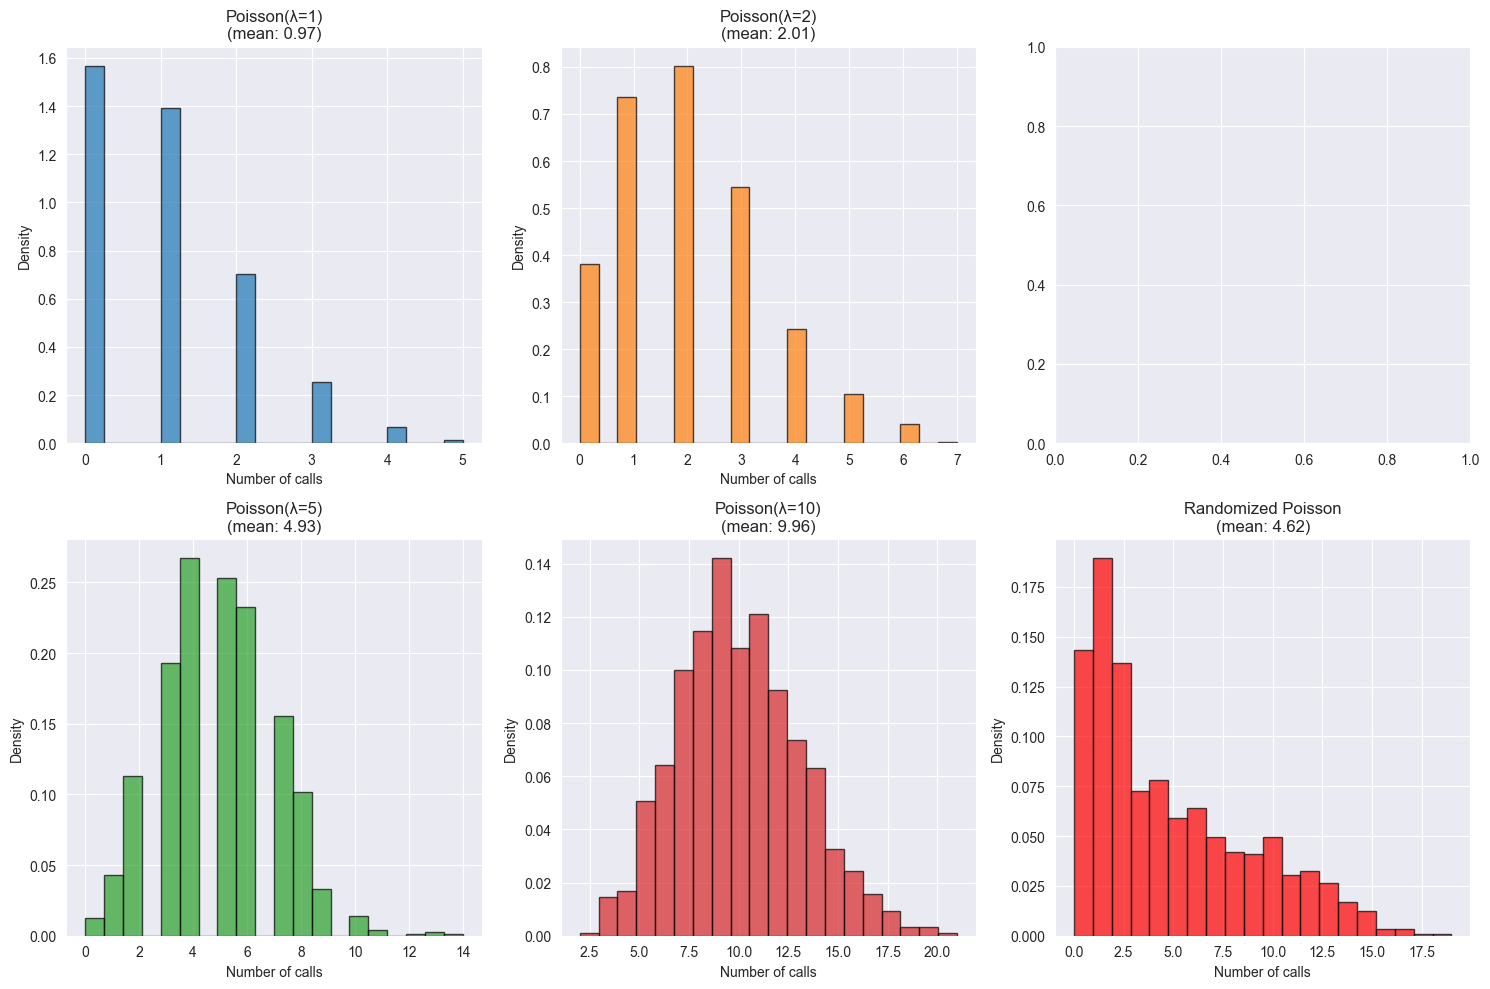

In [10]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (name, data) in enumerate(fixed_poissons.items()):
    row, col = i // 2, i % 2
    axes[row, col].hist(data, bins=20, alpha=0.7, density=True,
                       edgecolor='black', color=f'C{i}')
    axes[row, col].set_title(f'{name}\n(mean: {data.mean():.2f})')
    axes[row, col].set_xlabel('Number of calls')
    axes[row, col].set_ylabel('Density')

axes[1, 2].hist(randomized_poisson, bins=20, alpha=0.7, density=True,
               edgecolor='black', color='red')
axes[1, 2].set_title(f"Randomized Poisson\n(mean: {randomized_poisson.mean():.2f})")
axes[1, 2].set_xlabel('Number of calls')
axes[1, 2].set_ylabel('Density')

plt.tight_layout()
plt.savefig('poisson_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
